# Original Model run July 17th 2020

In our model we predict the number of Covid-10 Cases in the Midwestern United States through the end of 2020. Only showing predictions for state of Minnesota.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Load dataset from csv
usa = pd.read_csv('enigma_Aug_8_2020.csv')
usa.head()

# Remove not needed columns
usa = usa.drop(columns = ['state_fips', 'lat', 'long'])
usa.head()

# Convert dates to datetime
usa['datetime'] = pd.to_datetime(usa['date'])
usa.tail()

,state_name,date,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,datetime
8149,New York,6/26/2020,395972,31075,391220.0,3290097.0,NaN,3681317.0,244.0,951.0,167.0,70010.0,2020-06-26
8150,New York,6/27/2020,396669,31105,391923.0,3362656.0,NaN,3754579.0,230.0,908.0,167.0,70010.0,2020-06-27
8151,New York,6/28/2020,397293,31137,392539.0,3423946.0,NaN,3816485.0,229.0,869.0,167.0,70010.0,2020-06-28
8152,New York,6/29/2020,397684,31143,392930.0,3469983.0,NaN,3862913.0,216.0,853.0,136.0,70435.0,2020-06-29
8153,New York,6/30/2020,398142,31776,393454.0,3521484.0,NaN,3914938.0,217.0,891.0,137.0,70487.0,2020-06-30


In [6]:
# TODO issue below, function Make_MN() works, but I want to take the output of function and store it in MN. 

In [2]:
def Make_MN():
    '''function to make MN df'''
    
    #Load dataset from csv
    usa = pd.read_csv('enigma_Aug_8_2020.csv')
   
    # Remove not needed columns
    usa = usa.drop(columns = ['state_fips', 'lat', 'long'])

    # Convert dates to datetime
    usa['datetime'] = pd.to_datetime(usa['date'])
    
    # Create DF for just Minnesota
    MN =  usa[usa['state_name']=='Minnesota']


    # Summing case count for Western Northern Central by date
    # Groupby to consolidate cases by entire region
    MN= MN.groupby(["datetime"]).sum()
   

    # Sort by datetime and reset index
    MN.sort_values(by = 'datetime')
    MN = MN.reset_index()
    
    # Summing case count for Western Northern Central by date
    # Groupby to consolidate cases by entire region
    MN = MN.groupby(["datetime"]).sum()
  
    # Sort by datetime and reset index
    MN.sort_values(by = 'datetime')
    MN = MN.reset_index()
    #wnc_group.tail
    
    # Finish datetime conversion
    MN['datetime'] = pd.to_datetime(MN['datetime'])
    MN['day'] = MN['datetime'].map(lambda x: x.day)
    MN['month'] = MN['datetime'].map(lambda x: x.month)
    MN['year'] = MN['datetime'].map(lambda x: x.year)

    # Now create new column for growth rate
    MN['growth_rate'] = MN['cases'].pct_change()
    # Drop null value
    MN = MN.dropna()
    
    MN = MN
    return MN


Make_MN()
    

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,day,month,year,growth_rate
1,2020-03-07,1,0,2.0,48.0,0.0,50.0,0.0,0.0,0.0,0.0,7,3,2020,0.000000
2,2020-03-08,2,0,2.0,48.0,0.0,50.0,0.0,0.0,0.0,0.0,8,3,2020,1.000000
3,2020-03-09,2,0,5.0,80.0,0.0,85.0,0.0,0.0,0.0,0.0,9,3,2020,0.000000
4,2020-03-10,3,0,11.0,132.0,0.0,143.0,0.0,0.0,0.0,0.0,10,3,2020,0.500000
5,2020-03-11,5,0,21.0,217.0,0.0,238.0,0.0,0.0,0.0,0.0,11,3,2020,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2020-07-24,49528,1606,49488.0,873388.0,0.0,922876.0,108.0,278.0,0.0,42882.0,24,7,2020,0.015730
141,2020-07-25,50331,1611,50291.0,890405.0,0.0,940696.0,115.0,287.0,0.0,43625.0,25,7,2020,0.016213
142,2020-07-26,51193,1614,51153.0,906221.0,0.0,957374.0,115.0,273.0,0.0,44431.0,26,7,2020,0.017127
143,2020-07-27,51843,1616,51803.0,918923.0,0.0,970726.0,126.0,257.0,0.0,45198.0,27,7,2020,0.012697


In [3]:
# Save output of function to variable
MN = Make_MN()
MN.tail()

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered,day,month,year,growth_rate
140,2020-07-24,49528,1606,49488.0,873388.0,0.0,922876.0,108.0,278.0,0.0,42882.0,24,7,2020,0.015730
141,2020-07-25,50331,1611,50291.0,890405.0,0.0,940696.0,115.0,287.0,0.0,43625.0,25,7,2020,0.016213
142,2020-07-26,51193,1614,51153.0,906221.0,0.0,957374.0,115.0,273.0,0.0,44431.0,26,7,2020,0.017127
143,2020-07-27,51843,1616,51803.0,918923.0,0.0,970726.0,126.0,257.0,0.0,45198.0,27,7,2020,0.012697
144,2020-07-28,52321,1620,52281.0,927707.0,0.0,979988.0,138.0,294.0,0.0,45987.0,28,7,2020,0.009220


# Create ML Model
This model uses historical cases and growth rates to predict future Covid-19 cases in Minnesota.

In [4]:
def make_models():
    ''' function to run cases model'''
    # Make the model
    MN_model = LinearRegression()
    
    # Assign the features and the target
    X_Mn = MN[["day", "month", "year"]]
    y_Mn = MN[["cases"]]
    
    # Split the data for training and testing
    X_train_Mn, X_test_Mn, y_train_Mn, y_test_Mn = train_test_split(X_Mn, y_Mn, random_state=42)
    
    # Fit the model with the training data and score it with the testing data
    MN_model.fit(X_train_Mn, y_train_Mn)
    MN_model.score(X_test_Mn, y_test_Mn)
    
    # Make Dataframe for the holidays which will be used for the predicitons:
    # Labor Day, Election Day, Thanksgiving, Christmas

    holidays = {"day": [7, 3, 26, 25], "month": [9, 11, 11, 12], "year": [2020, 2020, 2020, 2020]}
    predict_holidays = pd.DataFrame(holidays)
    predict_holidays["datetime"] = pd.to_datetime((predict_holidays.year*10000 + predict_holidays.month*100+predict_holidays.day).apply(str),format='%Y%m%d')   


    
    
    # Predict with the model
    predictions = MN_model.predict(predict_holidays[["day", "month", "year"]])


    # convert predictions from ndarray to list
    preds_arr = []
    for i in predictions:
        preds_arr.append(np.asscalar(i))
    
    # Add the precitions back to the DataFrame and convert from object to 
    # float so we can use it for graphing
    predict_holidays["predicted_cases"] = predictions
    predict_holidays["predicted_cases"] = predict_holidays['predicted_cases'].astype('float')
    
    return predict_holidays

make_models()

,day,month,year,datetime,predicted_cases
0,7,9,2020,2020-09-07,63761.889408
1,3,11,2020,2020-11-03,86770.626148
2,26,11,2020,2020-11-26,95935.478724
3,25,12,2020,2020-12-25,107838.318945


In [5]:
# store output of function in variable
predict_holidays = make_models()
predict_holidays

,day,month,year,datetime,predicted_cases
0,7,9,2020,2020-09-07,63761.889408
1,3,11,2020,2020-11-03,86770.626148
2,26,11,2020,2020-11-26,95935.478724
3,25,12,2020,2020-12-25,107838.318945


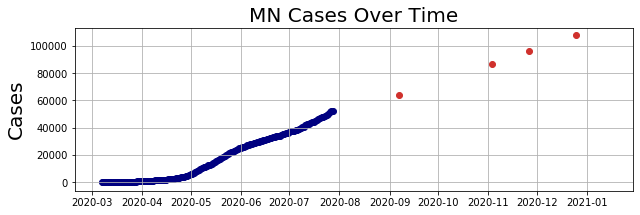

In [9]:
# Graph with Actual Values and Predicitons
plt.figure(figsize = (10, 3))
plt.scatter(predict_holidays['datetime'],predict_holidays['predicted_cases'],c='#d0312d',)
plt.scatter(MN['datetime'],MN['cases'],c='#000080',)
plt.grid(True)
plt.title('MN Cases Over Time', fontsize = 20)
plt.ylabel('Cases', fontsize = 20)
plt.show()


# Checking Predictions

In [42]:
# make df 
d = {'day':[7,3,26,25],'month':[9,11,11,12],'date':['Labor Day','Election Day','Thanksgiving','Christmas'],'predicted_cases':[62874,85478,95179,106903]}

#Name dataframe and load data.
predictions = pd.DataFrame(data=d)

# Updated predicted cases with actual cases.
d = {'day':[7,3,26,25],'month':[9,11,11,12],'predicted_cases':[62874,85478,95179,106903],'actual_cases':['78175','0','0','0']}
d
# Load data into dataframe.
predictions = pd.DataFrame(data=d)
predictions['actual_cases'].astype(int)

d = {'day':[7,3,26,25],'month':[9,11,11,12],'date':['Labor Day','Election Day','Thanksgiving','Christmas'],'predicted_cases':[62874,85478,95179,106903],'actual_cases':[78175,0,0,0]}

labor_day = pd.DataFrame(data=d)
labor_day

,day,month,date,predicted_cases,actual_cases
0,7,9,Labor Day,62874,78175
1,3,11,Election Day,85478,0
2,26,11,Thanksgiving,95179,0
3,25,12,Christmas,106903,0


<Figure size 432x288 with 0 Axes>

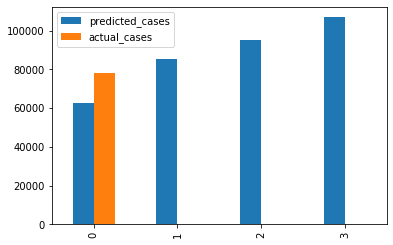

In [41]:
plt.figure();
ld.plot.bar()

#import seaborn as sns

#sns.set_theme(style="whitegrid")
#fig = plt.figure()
#ax = fig.add_axes([])
#dates = ['Labor Day']

### Segment out Minnesota


In [9]:
# Create DF for just Minnesota
MN =  usa[usa['state_name']=='Minnesota']
MN.sample(5)

# Summing case count for Western Northern Central by date
# Groupby to consolidate cases by entire region
MN= MN.groupby(["datetime"]).sum()
MN.tail()

# Sort by datetime and reset index
MN.sort_values(by = 'datetime')
MN = MN.reset_index()
MN.tail()

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
140,2020-07-24,49528,1606,49488.0,873388.0,0.0,922876.0,108.0,278.0,0.0,42882.0
141,2020-07-25,50331,1611,50291.0,890405.0,0.0,940696.0,115.0,287.0,0.0,43625.0
142,2020-07-26,51193,1614,51153.0,906221.0,0.0,957374.0,115.0,273.0,0.0,44431.0
143,2020-07-27,51843,1616,51803.0,918923.0,0.0,970726.0,126.0,257.0,0.0,45198.0
144,2020-07-28,52321,1620,52281.0,927707.0,0.0,979988.0,138.0,294.0,0.0,45987.0


In [10]:
# Check 
MN.head()

,datetime,cases,deaths,tests_positive,tests_negative,tests_pending,tests,patients_icu,patients_hosp,patients_vent,recovered
0,2020-03-06,1,0,1.0,36.0,0.0,37.0,0.0,0.0,0.0,0.0
1,2020-03-07,1,0,2.0,48.0,0.0,50.0,0.0,0.0,0.0,0.0
2,2020-03-08,2,0,2.0,48.0,0.0,50.0,0.0,0.0,0.0,0.0
3,2020-03-09,2,0,5.0,80.0,0.0,85.0,0.0,0.0,0.0,0.0
4,2020-03-10,3,0,11.0,132.0,0.0,143.0,0.0,0.0,0.0,0.0
